<h1 style="text-align:center;font-family:sans-serif;font-weight:bold">Assignment 03</h1>

#### Name:- Sk Fardeen Hossain 
#### Roll:- 2021CSB023
#### Department:- Computer Science and Technology 
#### G-Suite ID:- 2021csb023.sk@students.iiests.ac.in

In [1]:
import warnings 
warnings.filterwarnings('ignore')

## Question 1: 
Download the [Forest Cover Type Dataset](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset) and preprocess the dummy variables to
create training, test and development set. Reduce the train data size if the system is
unable to process the whole dataset.

In [2]:
import pandas as pd 
forest_cover_df = pd.read_csv('../ML_DRIVE/Assignment03/covtype.csv')
forest_cover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

As we can see above, all the columns are important since all have non-null values

In [3]:
forest_cover_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### Standardisation of non-binary data columns

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() 

'''
    @param:- [df:pd.DataFrame, col_name: string]
    @brief:- Function returns a standardised dataframe on the column `col_name`
    @return:- Standardised Dataframe
'''

def standardise(df:"pd.DataFrame",col_name:"str")->"pd.DataFrame":
    df[[col_name]]=pd.DataFrame(
        data = scaler.fit_transform(df[[col_name]]),
        columns=[col_name],
        index=df.index
    )

    return df

In [5]:
'''
 Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
'''
columns_to_standardise = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                          'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']


for col_name in columns_to_standardise:
    forest_cover_df=standardise(forest_cover_df,col_name)

forest_cover_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5


In [6]:
## Number of target classes
forest_cover_df[['Cover_Type']].value_counts()

Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
Name: count, dtype: int64

#### Since there high number of samples especially from classes `1`,`2`,`3` we need to perform random sampling across population points 

In [7]:
forest_cover_df_rough = forest_cover_df.sample(frac=0.1,random_state=5)
forest_cover_df_rough[['Cover_Type']].value_counts()

Cover_Type
2             28366
1             21062
3              3611
7              2068
6              1724
5               985
4               285
Name: count, dtype: int64

In [8]:
y=forest_cover_df_rough[['Cover_Type']]
X=forest_cover_df_rough.drop(columns=['Cover_Type'])
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
456056,1.223763,1.566773,0.653865,1.842264,3.029086,0.569409,-1.499673,-0.521973,0.952899,1.141607,...,0,0,0,0,0,0,0,0,0,1
456659,0.280854,1.816965,-0.280934,-0.067882,-0.213034,-0.778672,-0.379010,-0.269048,0.273596,0.379634,...,0,0,0,0,0,0,0,0,0,0
210876,1.095185,-0.827931,-0.414477,-0.703029,-0.264496,2.261886,0.666942,-0.269048,-0.562470,-1.058222,...,0,0,0,0,0,0,0,0,0,0
490911,-0.097739,-0.827931,0.653865,0.962468,1.159292,-1.083305,0.779008,-1.331334,-1.398536,-0.807503,...,0,0,1,0,0,0,0,0,0,0
267218,-2.994328,1.575708,1.321579,-1.126460,-0.659040,-0.806890,-2.060005,-1.078409,0.979026,-1.170743,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509165,0.777310,-1.194285,0.386780,0.938944,0.816211,-0.506747,-0.192233,-1.179579,-0.431835,0.103239,...,0,0,0,0,0,0,0,0,0,0
261011,0.266567,1.057451,0.119694,-0.373693,0.130048,-1.256464,-1.200830,0.995579,1.553822,-0.300025,...,0,1,0,0,0,0,0,0,0,0
278278,-2.165710,1.745482,1.989293,-0.561885,0.181510,-1.316750,-2.060005,-2.292450,0.195215,-1.215299,...,0,0,0,0,0,0,0,0,0,0
494618,0.923747,1.736546,-0.013849,-0.105520,-0.110110,-1.171167,-0.677854,-0.370218,0.430358,-0.809769,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 80% -> train | 10% -> validation | 10% -> testing
from sklearn.model_selection import train_test_split

X_train,X_rest,y_train,y_rest = train_test_split(X,y,random_state=5,test_size=0.2)
X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,random_state=5,test_size=0.5)

## Question 02: 
Consider only two features and three classes and train Logistic Regression 3-
class classifier (any three class) to show the training and test area in a 2D plane,
using matplotlib.

#### Here we are choosing the features `Elevation` and `SLope` which are to be mapped to classes `1`, `2`, `3`

In [10]:
X_train_subset = X_train[['Elevation','Slope']]
X_train_subset

,Elevation,Slope
257482,0.366573,0.520322
264358,-0.597766,1.588665
1767,-0.358467,0.787408
58906,-0.447758,-0.147392
390314,0.902317,-1.215734
...,...,...
53980,0.173705,0.119694
162900,0.988036,0.520322
41957,-1.065649,0.787408
15266,-0.719202,-0.280934


In [11]:
train_subset = X_train_subset.join(y_train)
train_subset = train_subset[train_subset['Cover_Type'].isin([1,2,3])]
train_subset

,Elevation,Slope,Cover_Type
257482,0.366573,0.520322,1
264358,-0.597766,1.588665,2
1767,-0.358467,0.787408,2
58906,-0.447758,-0.147392,2
390314,0.902317,-1.215734,1
...,...,...,...
53980,0.173705,0.119694,1
162900,0.988036,0.520322,2
41957,-1.065649,0.787408,2
15266,-0.719202,-0.280934,2


In [12]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(
    solver='saga',
    max_iter=10000,
) 
LR_model.fit(train_subset.iloc[:,0:2],train_subset.iloc[:,2])

LogisticRegression(max_iter=10000, solver='saga')

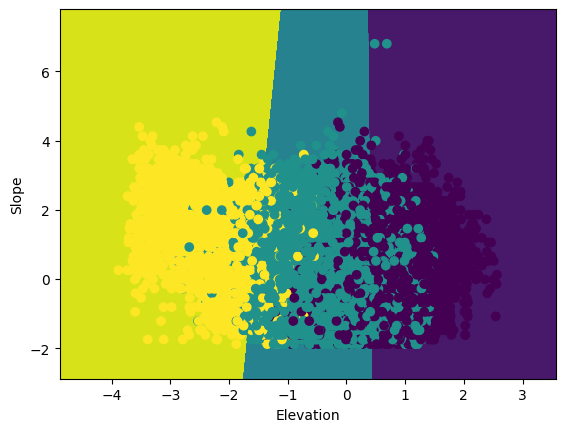

In [13]:
# Training Data
from sklearn.inspection import DecisionBoundaryDisplay

display_fig = DecisionBoundaryDisplay.from_estimator(
    LR_model,
    train_subset.iloc[:,0:2],
    xlabel = 'Elevation',
    ylabel = 'Slope',
    grid_resolution = 6000,
)

display_fig.ax_.scatter(
    train_subset['Elevation'],
    train_subset['Slope'],
    c=train_subset['Cover_Type']
)



In [16]:
X_test_subset = X_test[['Elevation','Slope']]

test_subset = X_test_subset.join(y_test)
test_subset = test_subset[test_subset['Cover_Type'].isin([1,2,3])]
test_subset

,Elevation,Slope,Cover_Type
402158,0.005839,-1.349277,2
271152,-2.097849,-1.215734,3
318946,0.305855,0.119694,2
554660,-1.008503,0.787408,2
450417,1.366628,0.119694,1
...,...,...,...
521316,0.748737,0.920951,1
540121,0.327285,-0.013849,2
153065,-0.176314,0.520322,2
192414,0.927318,-1.349277,1


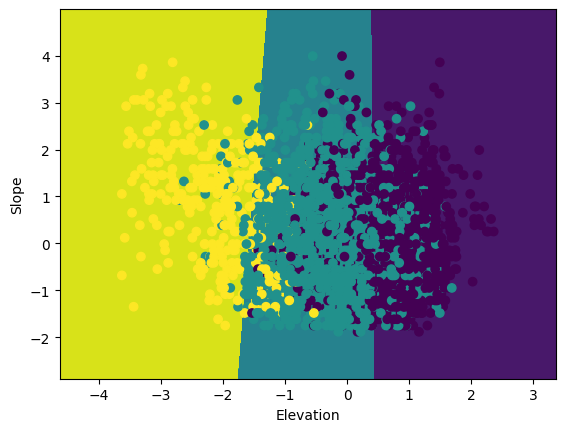

In [17]:
# Test Data

display_fig = DecisionBoundaryDisplay.from_estimator(
    LR_model,
    test_subset.iloc[:,0:2],
    xlabel = 'Elevation',
    ylabel = 'Slope',
    grid_resolution = 6000
)

display_fig.ax_.scatter(
    test_subset['Elevation'],
    test_subset['Slope'],
    c=test_subset['Cover_Type']
)

## Question 03:
Analyze and control the overfitting by varying the inverse of regularization
strength parameter (0.1, 0.25, 0.5, 0.75, 0.9) and plot the accuracy graph for the
test set.

In [18]:
from sklearn.metrics import accuracy_score

'''
    @params: - X_train,y_train,X_val,y_val,X_test,y_test,solver,inv_reg_str,penalty
    @return:- list([accuracy_before_finetune,accuracy_after_finetune])
    @brief:- Trains and tests a LR model on training, testing and validation dataset
'''

def LR_model_util(
    X_train: "pd.DataFrame",
    y_train: "pd.DataFrame", 
    X_val: "pd.DataFrame",
    y_val: "pd.DataFrame",
    X_test: "pd.DataFrame", 
    y_test: "pd.DataFrame",
    solver: "str",
    inv_reg_str: "double",
    penalty: "str"
)->"list":
    model = LogisticRegression(
        solver=solver, 
        C=inv_reg_str, 
        max_iter=10000,
        penalty=penalty
    )
    model.fit(X_train,y_train)
    y_pred_before_finetune = model.predict(X_val)
    accuracy_before_finetuning = accuracy_score(y_val,y_pred_before_finetune)
    model.fit(X_val,y_val) 
    y_pred_after_finetune = model.predict(X_test) 
    accuracy_after_finetuning= accuracy_score(y_test,y_pred_after_finetune)

    return [accuracy_before_finetuning,accuracy_after_finetuning]
    

In [19]:
X_val_subset = X_val[['Elevation','Slope']]


val_subset = X_val_subset.join(y_val)
val_subset = val_subset[val_subset['Cover_Type'].isin([1,2,3])]
val_subset

,Elevation,Slope,Cover_Type
286194,-0.072737,-0.013849,2
519090,-0.069166,-0.147392,2
429189,-0.069166,0.386780,1
175544,0.898745,-0.414477,2
320041,-1.554962,-0.414477,2
...,...,...,...
120920,-0.154885,-0.681563,2
451493,1.013037,-0.548020,1
391006,0.716592,0.386780,1
508515,0.948748,-0.147392,1


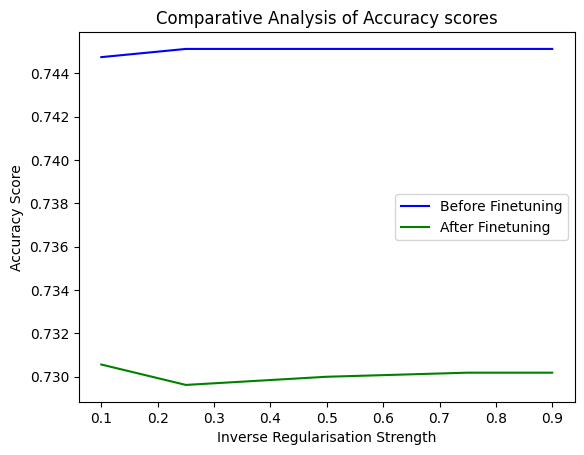

In [22]:
import matplotlib.pyplot as plt 

inverse_regularization_strength_list = [0.1,0.25,0.5,0.75,0.9]

train_subset_X = train_subset.iloc[:,0:2]
train_subset_y = train_subset.iloc[:,2]
val_subset_X = val_subset.iloc[:,0:2]
val_subset_y = val_subset.iloc[:,2]
test_subset_X = test_subset.iloc[:,0:2]
test_subset_y = test_subset.iloc[:,2]

accuracy_before_finetune=[]
accuracy_after_finetune=[]

for C in inverse_regularization_strength_list:
    acc_b_f,acc_a_f = LR_model_util(train_subset_X,train_subset_y,val_subset_X,val_subset_y,
                                    test_subset_X,test_subset_y,"saga",C,"l1")
    accuracy_before_finetune.append(acc_b_f)
    accuracy_after_finetune.append(acc_a_f)

plt.plot(inverse_regularization_strength_list,accuracy_before_finetune,"blue",label="Before Finetuning")
plt.plot(inverse_regularization_strength_list,accuracy_after_finetune,"green",label="After Finetuning")


plt.title("Comparative Analysis of Accuracy scores")
plt.xlabel('Inverse Regularisation Strength')
plt.ylabel('Accuracy Score')

plt.legend()

plt.show()


## Question 04:
Apply multiclass classification in Support Vector Machine (SVM) using Forest
Cover Type dataset.